In [46]:
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans
from skimage.color import rgb2gray
import os
import zipfile as zf
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import tkinter as tkinter
from tkinter import filedialog
import matplotlib.pyplot as plt
from skfuzzy import cmeans
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [2]:
# Function to open a file selection dialog and return the chosen file path
def get_file_path():
  root = tkinter.Tk()
  root.withdraw()  # Hide the main window
  filepath = filedialog.askopenfilename(title="Select Zip File", filetypes=[("Zip Files", "*.zip")])
  return filepath

# Get the zip file path using the function
zip_file_path = get_file_path()

# Now you can use the retrieved path to unzip the file using zipfile
if zip_file_path:
  with zf.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall()


In [28]:

# Define expected extracted folder name
extracted_folder_name = "rice_leaf_diseases"

# Get the current working directory
current_dir = os.getcwd()

# Check if the extracted folder exists in the current directory
if os.path.isdir(os.path.join(current_dir, extracted_folder_name)):
  image_path = os.path.join(current_dir, extracted_folder_name)
else:
  # Handle case where folder isn't found in current directory
  # (e.g., prompt user for path or raise an error)
  print("Extracted folder not found in current directory!")



In [47]:

print(tf.__version__)


2.16.1


In [63]:

# Define target image size for your CNN model (e.g., 224x224)
target_size = (224, 224)

train_datagen = ImageDataGenerator(rescale=1./255)



# Use flow_from_directory to load images from the path
train_generator = train_datagen.flow_from_directory(
    image_path,
    target_size=target_size,
    batch_size=32,  # Adjust batch size as needed
    class_mode='categorical'  # Assuming multiple disease categories
)


Found 120 images belonging to 3 classes.


In [60]:
print(train_generator.class_indices(np.argmax(sample_labels[i])))

TypeError: 'dict' object is not callable

Predicted label index: 2


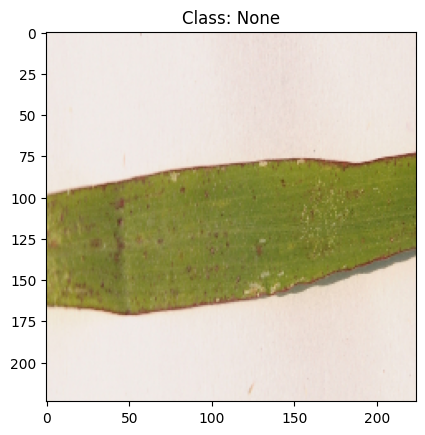

Predicted label index: 1


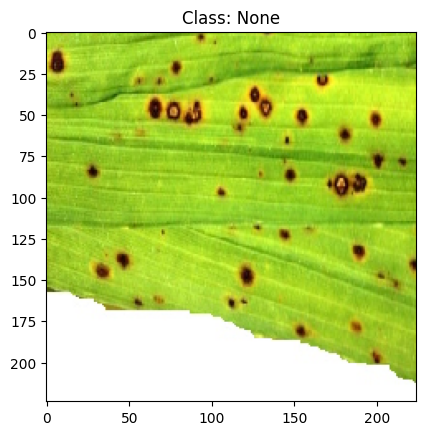

Predicted label index: 0


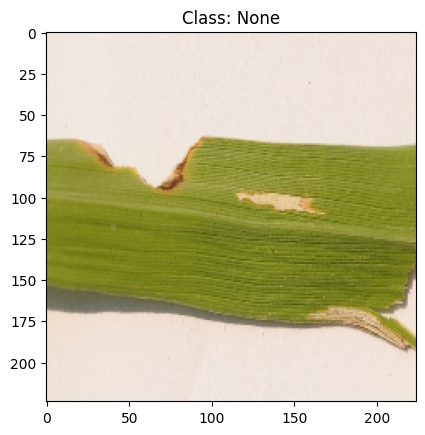

In [71]:
# Get a sample batch of images and labels from the data generator
sample_batch, sample_labels = next(train_generator)
# print(sample_labels)

# Loop through all images in the sample batch
for i in range(3):  # Adjust loop limit as needed
  # Select an image from the batch

  # ... rest of the loop code ...
  predicted_label = np.argmax(sample_labels[i])
  print(f"Predicted label index: {predicted_label}")


  sample_image = sample_batch[i]

  # Reshape the image to its original dimensions (if needed)
  sample_image = sample_image.reshape(target_size[0], target_size[1], 3)

  # Retrieve class name using class_indices
  class_name = train_generator.class_indices.get(predicted_label)

  # Print the image and its corresponding class label
  plt.imshow(sample_image)
  plt.title(f"Class: {class_name}")
  plt.show()


In [3]:
def apply_median_filter(image, kernel_size=3):
  """
  Applies a median filter to a grayscale image.

  Args:
      image: NumPy array representing the grayscale image.
      kernel_size: Size of the median filter kernel (default 3).

  Returns:
      A NumPy array representing the filtered image.
  """
  # Pad the image to handle boundaries
  padded_img = np.pad(image, (1, 1), mode='edge')
  # Apply median filter along each axis (consider alternative filter implementations)
  filtered_img = np.median(padded_img, axis=(0, 1))
  return filtered_img


In [4]:
def load_images_from_folder(folder, target_size=(256, 256), kernel_size=3):
  images = []
  labels = []
  for label in os.listdir(folder):
    label_path = os.path.join(folder, label)
    if os.path.isdir(label_path):
      for filename in os.listdir(label_path):
        img_path = os.path.join(label_path, filename)
        if img_path.endswith(".jpg") or img_path.endswith(".png"):
          # Open image in grayscale mode
          img = Image.open(img_path).convert('L')
          # Resize image to a consistent size
          img = img.resize(target_size)
          # Convert image to numpy array
          img_array = np.array(img)
          
          # Apply the median filter function
          filtered_img = apply_median_filter(img_array, kernel_size)
          
          images.append(filtered_img)
          labels.append(label)  # Use folder name as label
  return np.array(images), np.array(labels)

In [5]:
images, label = load_images_from_folder("rice_leaf_diseases", (256,256))

In [13]:

# Print images list to check for emptiness
print("Loaded images:", images)


Loaded images: [107. 228. 139. 159. 113. 226. 118. 243. 125. 254. 145. 130. 255.  91.
 228.  93.  88. 227. 254. 232. 229. 153. 110. 128. 219. 254. 150. 255.
 255. 216. 194. 254. 154. 255. 132. 255. 125. 136. 160. 229. 182. 141.
 133. 196. 133. 177. 176. 163. 129. 175. 201. 136. 162.]


Error visualizing image: Invalid shape () for image data


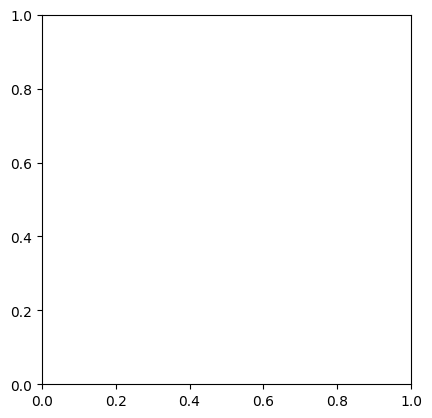

In [14]:

# Try visualizing the first image (assuming it's not empty)
if len(images) > 0:
  try:
    plt.imshow(images[0], cmap='gray')  # Grayscale image
    plt.show()
  except Exception as e:
    print(f"Error visualizing image: {e}")